In [5]:
import cv2
import matplotlib.pyplot as plt

from tqdm import tqdm
from itertools import chain
from skimage.io import imread, imshow, imread_collection, concatenate_images
from skimage.transform import resize
from skimage.morphology import label
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K

In [6]:
# the coefficient takes values in [0, 1], where 0 is the worst score, 1 is the best score
# the dice coefficient of two sets represented as vectors a, b ca be computed as (2 *|a b| / (a^2 + b^2))
def dice_coefficient(y_true, y_pred):
    eps = 1e-6
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection) / (K.sum(y_true_f * y_true_f) + K.sum(y_pred_f * y_pred_f) + eps)

1/1 [==============================] - 1s 878ms/step


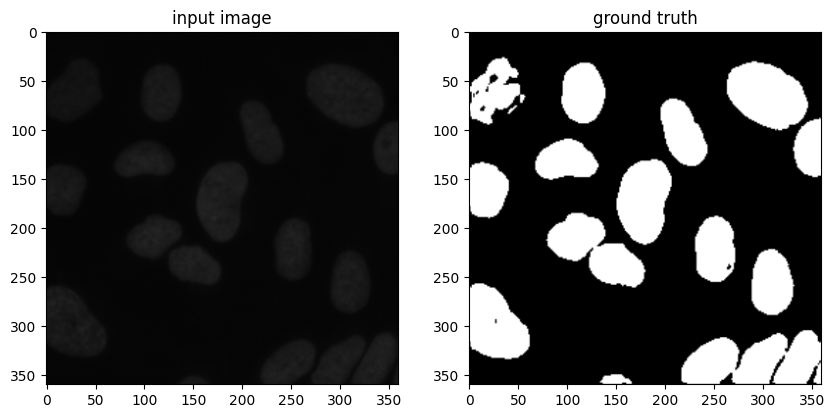

In [9]:
# INPUT
# Write model ESRF_Seg_Hands_on_best_model.h5 path
model_path_ = "/home/g-laris89/DEEP-NAPARI/Exercise-4_My first widget/model/ESRF_Seg_Hands_on_best_model.h5"
input_ = "/home/g-laris89/DEEP-NAPARI/Exercise-4_My first widget/images/03f583ec5018739f4abb9b3b4a580ac43bd933c4337ad8877aa18b1dfb59fc9a.png"

model_New = tf.keras.models.load_model(model_path_,custom_objects={'dice_coefficient': dice_coefficient})

_, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS = list(model_New.input.shape)
X = np.zeros((1, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
img_ = imread(input_)[:,:,:IMG_CHANNELS]
h_or, w_or, _ = img_.shape
img = resize(img_, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
X[0] = img

preds_test = model_New.predict(X, verbose=1)
# we apply a threshold on predicted mask (probability mask) to convert it to a binary mask.
preds_test_opt = (preds_test > 0.5).astype(np.uint8) 
result_ = np.squeeze(preds_test_opt[0, :, :, 0])

#OUTPUT
output_ = resize(result_, (h_or, w_or), mode='constant', preserve_range=True)

fig = plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.imshow(cv2.cvtColor(img_, cv2.COLOR_BGR2RGB))
plt.title("input image")
plt.subplot(122)
plt.imshow(output_, cmap='gray')
plt.title("ground truth")
# show the plot
plt.show()